In [1]:
import numpy as np
from tensorflow.keras.datasets.mnist import load_data
import cv2

In [2]:
(X_train,y_train),(X_test,y_test)=load_data()

In [3]:
# ตรวจดู shape ของข้อมูลเพื่อดูความละเอียดละจำนวนภาพ
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


**resize เพื่อให้ภาพใหญ่ขึ้น**

In [4]:
X_train2 = []
for i in range(60000):
  X_train2.append(cv2.resize(X_train[i], (112, 112)))
X_train = np.array(X_train2)
X_train.shape

(60000, 112, 112)

In [5]:
X_test2 = []
for i in range(10000):
  X_test2.append(cv2.resize(X_test[i], (112, 112)))
X_test = np.array(X_test2)
X_test.shape

(10000, 112, 112)

In [6]:
X_train[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
y_train[0]

5

**ลอง plot ภาพมาดู**

In [8]:
import matplotlib.pyplot as plt

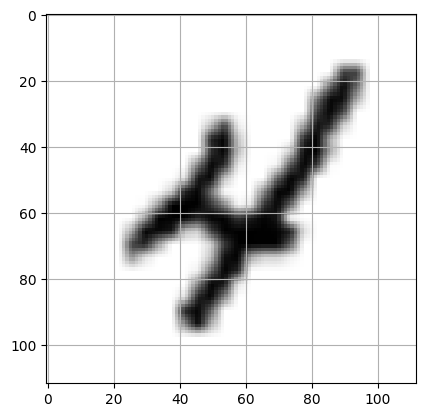

In [9]:
#ลอง plot ภาพมาดู
img = X_train[9]
plt.imshow(img,cmap=plt.cm.gray_r)
plt.grid()
plt.show()

In [10]:
def visual_multi(i):
  nplots=40
  fig=plt.figure(figsize= (8,4))
  for j in range(nplots):
    plt.subplot(4,10,j+1) #4 rows 10 columns
    plt.imshow(X_train[i+j],cmap=plt.cm.gray_r)
    plt.title(y_train[i+j]) #เขียนกำกับเลข
    plt.xticks([])
    plt.yticks([])
  plt.show()

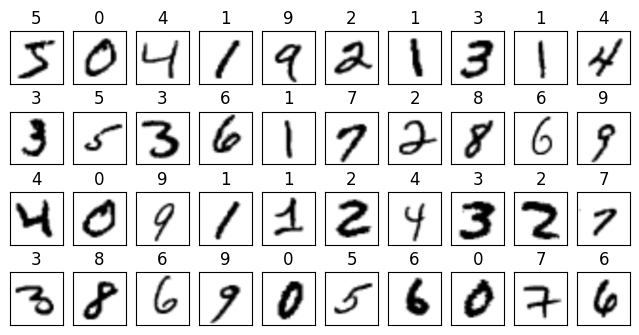

In [11]:
visual_multi(0)

**reshape ภาพให้พร้อมนำเข้าโมเดล**

In [12]:
X_train = X_train.reshape(60000,112,112,1)

In [13]:
X_test = X_test.reshape(10000,112,112,1)

In [14]:
#ตรวจดูค่าเพื่อทำการปรับให้อยู่ระหว่าง 0,1
print(np.max(X_train),np.min(X_train))

255 0


In [15]:
#ปรับภาพให้อยู่ในช่วง 0,1
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

In [16]:
7000*(0.8/0.2)

28000.0

In [17]:
6000/(6000*(0.8/0.2))

0.25

In [18]:
#ดึงข้อมูลมาบางส่วน ก่อนเพื่อให้ fit โมเดลได้เร็วขึ้น
X_train = X_train[:28000]
X_test  = X_test[:10000]
y_train = y_train[:28000]
y_test = y_test[:10000]

In [19]:
#ดูว่าข้อมูล 1000 ค่าสังเกต มีตัวเลขครบทุกตัวไหม
nclass=len(np.unique(y_train))
nclass

10

In [20]:
unique, counts = np.unique(y_test, return_counts=True)
>>> print(np.asarray((unique, counts)).T)

[[   0  980]
 [   1 1135]
 [   2 1032]
 [   3 1010]
 [   4  982]
 [   5  892]
 [   6  958]
 [   7 1028]
 [   8  974]
 [   9 1009]]


In [21]:
from tensorflow.keras.regularizers import l1,l2

In [22]:
#สร้างตัวแบบ CNN เพื่อทำนาย
from keras.layers import LeakyReLU
inshape=X_train.shape[1:]
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_regularizer=l2(0.01),input_shape=inshape))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3),activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(nclass,activation='softmax'))

In [23]:
#ตรวจดูตัวแบบ
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 55, 55, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 26, 26, 64)        0

In [60]:
#สร้างตัวแบบ
from tensorflow.keras.utils import plot_model
plot_model(model,'digit.png',show_shapes=True,show_layer_names=True)
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
import time
start=time.time()
history = model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=0,validation_split=0.25)
end=time.time()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [61]:
#ดู Accucarcy
score=model.evaluate(X_test,y_test,verbose=0)
print('Accuracy',score[1])
print('loss',score[0])

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
#ตรวจดูค่า loss ว่าเกิดปัญหา overfit หรือไม่
plt.plot(history.history['loss'],color='b',label='Training')
plt.plot(history.history['val_loss'],'r--',label='Validaton')
plt.title("Loss")
plt.legend()
plt.show()

In [ ]:
y_pred_p=model.predict(X_test)
y_pred=np.argmax(y_pred_p,axis=1)

In [ ]:
#สร้าง confustion_matrix เพื่อดูว่าเลขไหนถูกผิดยังไงบ้าง
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

**นำภาพของแต่ละกลุุ่มเข้า**

In [30]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#import tensorflow_datasets as tfds
import tensorflow as tf
data_dir = 'C:/Users/matages/Desktop/Project mnist/Dataset_Number'

In [31]:
dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  image_size=(500, 500),
  batch_size=50,
  color_mode='grayscale')

Found 50 files belonging to 10 classes.


In [32]:
class_names = dataset.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


**ตรวจดูรูปที่นำเข้า**

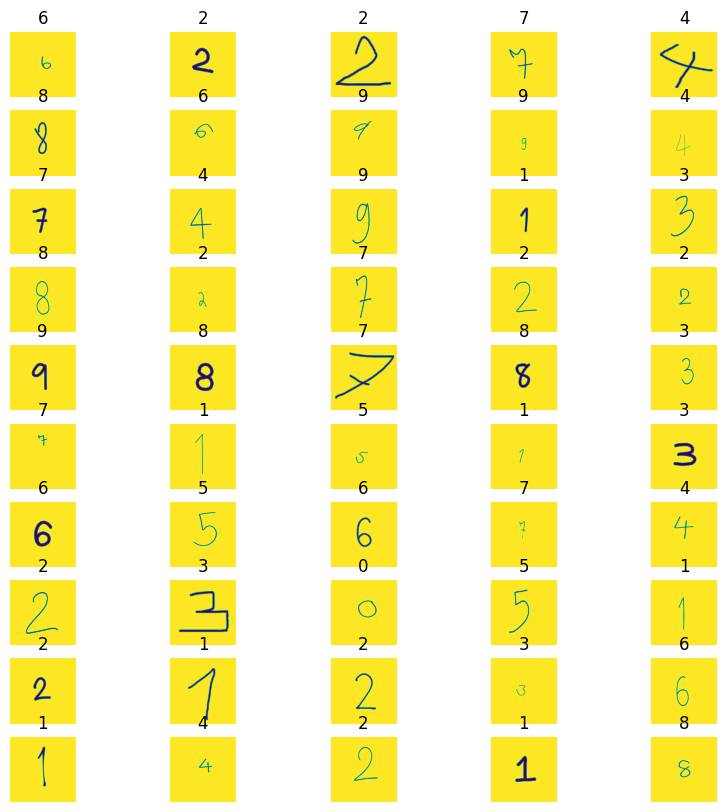

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
  for i in range(50):
    ax = plt.subplot(10, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**ดึงข้อมูลภาพออกมาแล้วทำให้เป็น numpy array แล้วตรวจดูภาพ**

In [34]:
for image_batch, labels_batch in dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(50, 500, 500, 1)
(50,)


In [35]:
img_r = image_batch.numpy()

In [36]:
y_r = labels_batch.numpy()

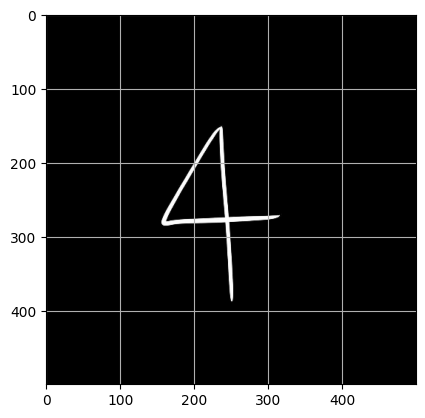

In [37]:
img = img_r[1]
plt.imshow(img,cmap=plt.cm.gray_r)
plt.grid()
plt.show()

**กลับสีภาพขาวดำ เพื่อให้ตรงกับข้อมูลจาก mnist**

In [38]:
img_r_r = 255-img_r

In [39]:
def visual_multi(i):
  nplots=50
  fig=plt.figure(figsize= (10,10))
  for j in range(nplots):
    plt.subplot(5,10,j+1) #4 rows 10 columns
    plt.imshow(img_r_r[i+j],cmap=plt.cm.gray_r)
    plt.title(y_r[i+j]) #เขียนกำกับเลข
    plt.xticks([])
    plt.yticks([])
  plt.show()

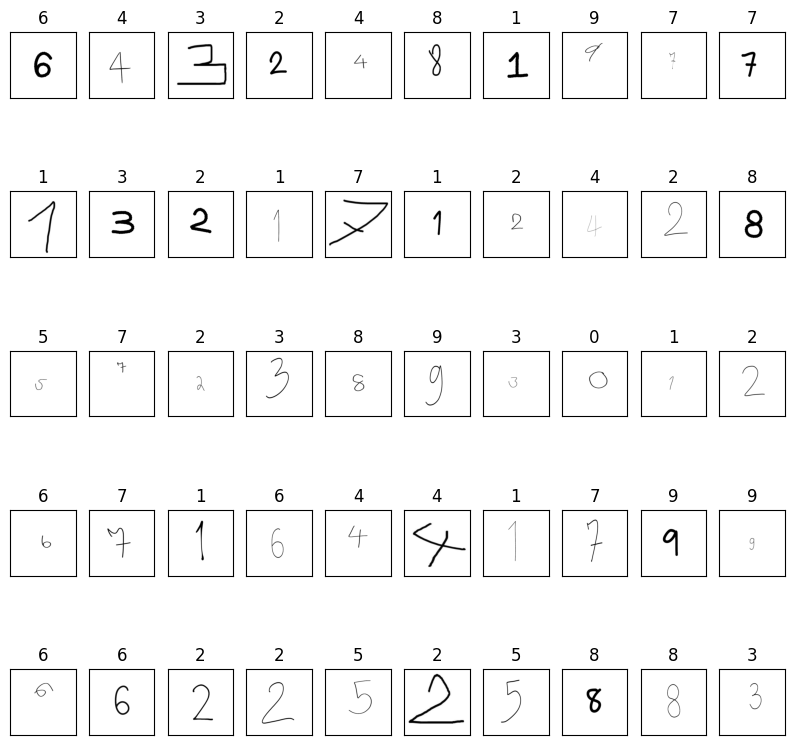

In [40]:
visual_multi(0)

**Crop**

In [41]:
def crop_im(imageT) :
  from PIL import Image
  for y in range(500):
    for x in range(500):
      if imageT[y][x][0] > 51:
        break
    if imageT[y][x][0] > 51:
      min_y = y
      break
  for x in range(500):
    for y in range(500):
      if imageT[y][x][0] > 51:
        break
    if imageT[y][x][0] > 51:
      min_x = x
      break
  for y in reversed(range(500)):
    for x in reversed(range(500)):
      if imageT[x][y][0] > 51:
        break
    if imageT[x][y][0] > 51:
      max_x = y
      break
  for y in reversed(range(500)):
    for x in reversed(range(500)):
      if imageT[y][x][0] > 51:
        break
    if imageT[y][x][0] > 51:
      max_y =y
      break
  cen_x = int((min_x+max_x)/2)
  cen_y = int((min_y+max_y)/2)
  rx = int(max_x - cen_x)
  ry = int(max_y - cen_y)
  r  = int(max(rx,ry))+20
  if min((cen_y - r),(cen_y+r),(cen_x-r),(cen_x+r)) < 0:
    image_crop = imageT[min_y-20:max_y+20,min_x-20:max_x+20]
  else:
    image_crop = imageT[(cen_y - r):(cen_y+r) ,(cen_x-r):(cen_x+r)]
  return cv2.resize(image_crop, (112, 112))

In [42]:
img_r_r_c = []
for i in range(50):
  img_r_r_c.append(crop_im(img_r_r[i]))

In [43]:
img_r_r_c = np.array(img_r_r_c)

**ตรวจดูภาพที่ถูกทำการปรับแล้ว**

In [44]:
def visual_multi(i):
  nplots=50
  fig=plt.figure(figsize= (10,10))
  for j in range(nplots):
    plt.subplot(5,10,j+1) #4 rows 10 columns
    plt.imshow(img_r_r_c[i+j],cmap=plt.cm.gray_r)
    plt.title(y_r[i+j]) #เขียนกำกับเลข
    plt.xticks([])
    plt.yticks([])
  plt.show()

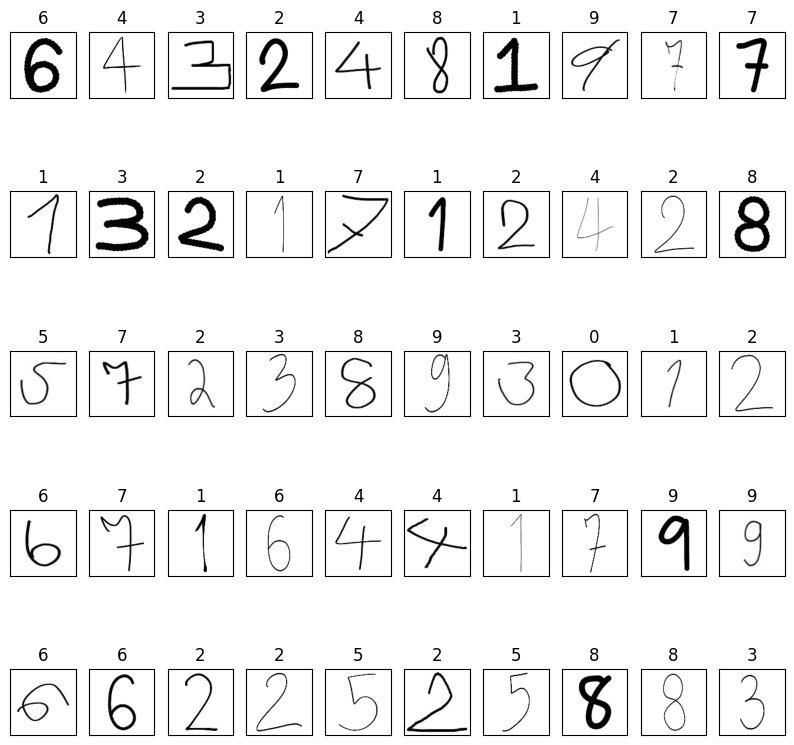

In [45]:
visual_multi(0)

In [46]:
img_r_r2 = []
for i in range(45):
  img_r_r2.append(cv2.resize(img_r_r[i], (112, 112)))
img_r_r2 = np.array(img_r_r2)
img_r_r2.shape

(45, 112, 112)

In [47]:
img_r_r2 = img_r_r_c.reshape(50, 112, 112,1)

**ปรับข้อมูลให้อยู่ในช่วง 0,1**

In [48]:
print(np.min(img_r_r2),np.max(img_r_r2))

0.0 255.0


In [49]:
img_r_r_n = img_r_r2.astype('float32')/255

**ทำนายภาพด้วยโมเดลจาก mnist**

In [62]:
Real=model.predict(img_r_r_n)
Real_pred_cls=np.argmax(Real,axis=1)

2/2 [==============================] - 0s 120ms/step


In [63]:
#ดูจำนวนภาพที่ผิด
idx_miss=np.where(Real_pred_cls != y_r)
print(len(idx_miss[0]))

32


In [64]:
#หาค่า accuracy
print("accuracy",round((1 - len(idx_miss[0])/len(y_r))*100,2),"%")

accuracy 36.0 %


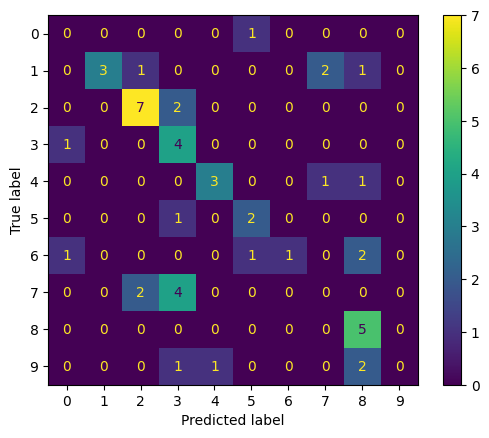

In [53]:
#สร้าง confustion_matrix เพื่อดูว่าเลขไหนถูกผิดยังไงบ้าง
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_r, Real_pred_cls)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_r,Real_pred_cls))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.43      0.60         7
           2       0.70      0.78      0.74         9
           3       0.33      0.80      0.47         5
           4       0.75      0.60      0.67         5
           5       0.50      0.67      0.57         3
           6       1.00      0.20      0.33         5
           7       0.00      0.00      0.00         6
           8       0.45      1.00      0.62         5
           9       0.00      0.00      0.00         4

    accuracy                           0.50        50
   macro avg       0.47      0.45      0.40        50
weighted avg       0.55      0.50      0.46        50



C:\Users\matages\anaconda3\envs\my_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\matages\anaconda3\envs\my_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\matages\anaconda3\envs\my_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [55]:
img_miss = img_r_r_c[idx_miss]

In [56]:
def visual_multi_error(x,y,i):
  nplots=len(idx_miss[0])
  fig=plt.figure(figsize= (10,10))
  for j in range(nplots):
    plt.subplot(5,10,j+1)
    plt.imshow(x[i+j],cmap=plt.cm.gray_r)
    plt.title(y[idx_miss][i+j]) #เขียนกำกับเลข
    plt.xticks([])
    plt.yticks([])
  plt.show()

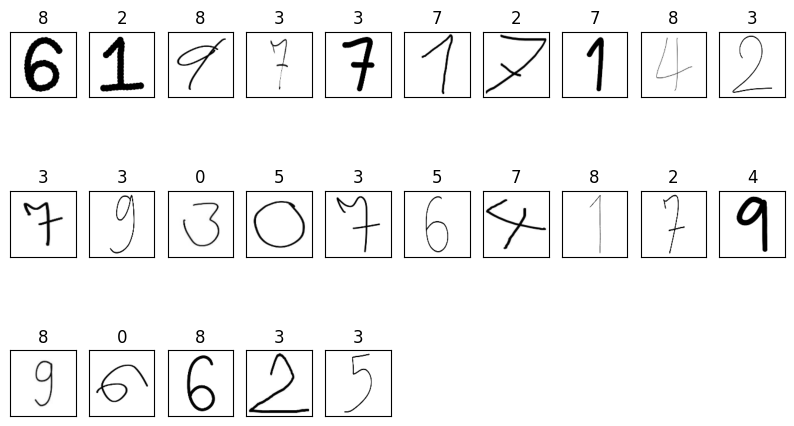

In [57]:
visual_multi_error(img_miss,Real_pred_cls,0)

In [58]:
idx_miss

(array([ 0,  6,  7,  8,  9, 10, 14, 15, 17, 18, 21, 25, 26, 27, 31, 33, 35,
        36, 37, 38, 39, 40, 41, 45, 46], dtype=int64),)

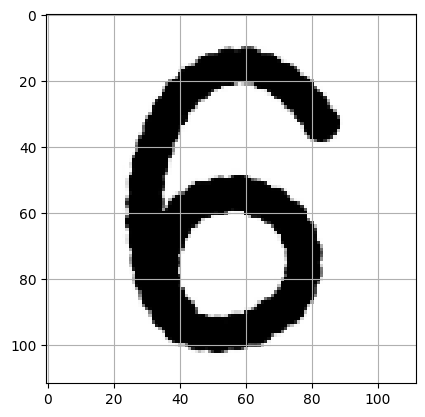

In [59]:
img = img_r_r_c[0]
plt.imshow(img,cmap=plt.cm.gray_r)
plt.grid()
plt.show()